In [3]:
import sklearn.linear_model as lm

In [39]:
#loading the Data

import pandas as pd

df = pd.read_csv('CrashData.csv' , engine='python')

df.describe() #will returns the quick stats such as count, mean, std (standard
#deviation) min, first quartile, median, third quartile, max on each column
#of the dataframe

df.cov()  #Covariance indicates how two variables are related. A positive
#covariance means the variables are positively related, while a negative
#covariance means the variables are inversely related. Drawback of covariance
#is that it does not tell you the degree of positive or negative relation

df.corr() #Correlation is another way to determine how two variables are
#related. In addition to telling you whether variables are positively or
#inversely related, correlation also tells you the degree to which the
#variables tend to move together. When you say that two items correlate, you
#are saying that the change in one item effects a change in another item. You
#ill always talk about correlation as a range between -1 and 1

df.dtypes


Master Record Number      int64
Year                      int64
Month                     int64
Day                       int64
DayType                  object
Hour                    float64
Collision Type           object
Injury Type              object
Primary Factor           object
Reported_Location        object
Latitude                float64
Longitude               float64
dtype: object

In [41]:
df.fillna(value=0)

,Master Record Number,Year,Month,Day,DayType,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...,...
53938,900084526,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,900089213,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,900095322,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,900099922,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [44]:
df = df[0:3000]
df.describe()

,Master Record Number,Year,Month,Day,Hour,Latitude,Longitude
count,3.000000e+03,3000.0,3000.000000,3000.000000,3000.000000,2971.000000,2971.000000
mean,9.024462e+08,2015.0,4.902667,4.246667,1337.600000,35.249089,-77.887751
std,4.637601e+04,0.0,2.595144,1.890771,521.680257,11.749632,25.962157
min,9.023634e+08,2015.0,1.000000,1.000000,0.000000,0.000000,-87.635098
25%,9.024077e+08,2015.0,3.000000,3.000000,1000.000000,39.136448,-86.554901
50%,9.024421e+08,2015.0,5.000000,4.000000,1400.000000,39.164271,-86.531370
75%,9.024875e+08,2015.0,7.000000,6.000000,1700.000000,39.173344,-86.506992
max,9.025361e+08,2015.0,10.000000,7.000000,2300.000000,40.175924,0.000000


In [53]:
df.DayType.replace(['Weekday', 'Weekend'], [1, 0], inplace=True)
print (df)


      Master Record Number  Year  Month  Day  DayType    Hour Collision Type  \
0                902363382  2015      1    5        1     0.0          2-Car   
1                902364268  2015      1    6        1  1500.0          2-Car   
2                902364412  2015      1    6        0  2300.0          2-Car   
3                902364551  2015      1    7        0   900.0          2-Car   
4                902364615  2015      1    7        0  1100.0          2-Car   
...                    ...   ...    ...  ...      ...     ...            ...   
2995             902523132  2015      9    3        1  1700.0          1-Car   
2996             902523253  2015      9    3        1  2100.0          1-Car   
2997             902523342  2015      9    6        1  1100.0          2-Car   
2998             902523376  2015      9    5        1  1500.0          1-Car   
2999             902523451  2015      9    6        1  1200.0          2-Car   

             Injury Type               

In [54]:
import numpy as np

x = df.Day[:, np.newaxis] # this is the independent Variable
y = df.DayType            # this is the dependent Variable

In [55]:
#Now we create the linear regression object
lr = lm.LinearRegression()

In [56]:
#Train the model using Train sets
# chekinf for the NAN and Inf values so we set it to the mean to avoid errors

lr.fit(x, y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 0, 'Day')

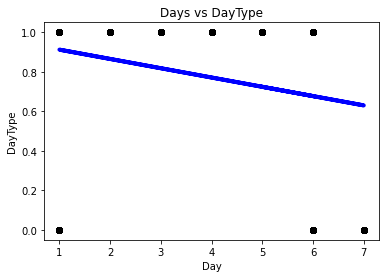

In [57]:

# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=4)
plt.title('Days vs DayType')
plt.ylabel('DayType')
plt.xlabel('Day')

In [74]:
# add predict value to the data frame
df['DayType_Pred'] = lr.predict(x)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt



In [80]:
#Using built-in function
print ("R Squared : ", r2_score(df.DayType, df.DayType_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.DayType, df.DayType_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.DayType, df.DayType_Pred)))

R Squared :  1.0
Mean Absolute Error:  0.0
Root Mean Squared Error:  0.0


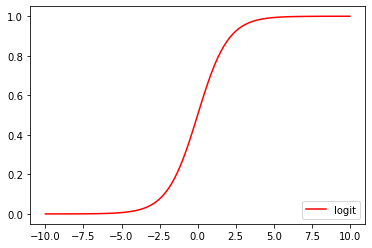

In [81]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

In [90]:
#lets run logistics regression 
from sklearn.linear_model import LogisticRegression
# manually add intercept
df['intercept'] = 1
independent_variables = ['DayType', 'intercept']

In [91]:
x = df[independent_variables] # independent variable
y = df['Day'] # dependent variable

In [94]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

In [97]:
# check the accuracy on the training set
model.score(x, y)
print (model.predict(x))
print (model.predict_proba(x)[:,0])
print ('Predicted probability:', model.predict_proba(x)[:,1])
print ('Predicted Class:',model.predict(x))

[6 6 6 ... 6 6 6]
[0.02587027 0.00823523 0.00823523 ... 0.00823523 0.02587027 0.00823523]
Predicted probability: [0.06247713 0.02446285 0.02446285 ... 0.02446285 0.06247713 0.02446285]
Predicted Class: [6 6 6 ... 6 6 6]


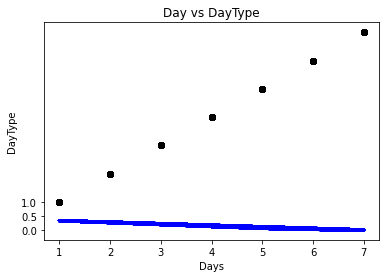

In [99]:
#plotting fitted line
plt.scatter(df.Day, y, color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Day, model.predict_proba(x)[:,1], color='blue',
linewidth=3)
plt.title('Day vs DayType')
plt.ylabel('DayType')
plt.xlabel('Days')
plt.show()

In [104]:
from sklearn import metrics , svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm  import SVC
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 0.747
Confusion matrix : [[  0 280   0   0   0   0   0]
 [  0 402   0   0   0   0   0]
 [  0   0 421   0   0   0   0]
 [  0   0   0 459   0   0   0]
 [  0   0   0   0   0 479   0]
 [  0   0   0   0   0 551   0]
 [  0   0   0   0   0   0 408]]
classification report :               precision    recall  f1-score   support

           1       0.00      0.00      0.00       280
           2       0.59      1.00      0.74       402
           3       1.00      1.00      1.00       421
           4       1.00      1.00      1.00       459
           5       0.00      0.00      0.00       479
           6       0.53      1.00      0.70       551
           7       1.00      1.00      1.00       408

    accuracy                           0.75      3000
   macro avg       0.59      0.71      0.63      3000
weighted avg       0.61      0.75      0.66      3000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
